# Lección 4: Metricas

### Ejercicios de pair programming 30 de enero.

In [32]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [33]:
# abrimos el df con los datos codificados y estandarizados
df_est = pd.read_csv("datos/est_enc_airlines.csv", index_col = 0)
df_est.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Distance
0,1,1,1,1.041667,1,0,-1.5,-1.5,-1.5,-0.5,...,-0.333333,-1.0,-1.333333,-0.5,2.0,-0.5,-1.0,0.000000,0.000000,0.0
1,1,0,1,0.291667,1,2,-1.5,-1.5,-1.5,0.0,...,-0.333333,0.0,0.000000,0.0,-1.0,-0.5,-1.0,25.833333,23.461538,0.0
2,1,1,1,-1.041667,1,0,-1.5,-1.5,-1.5,0.0,...,-0.666667,-1.0,-0.333333,0.0,1.0,0.0,-1.0,0.000000,0.000000,0.0
3,1,1,1,0.833333,1,0,-1.5,-1.5,-1.5,0.0,...,-1.000000,-3.0,-1.333333,-1.5,1.0,-1.5,-0.5,0.000000,0.000000,0.0
4,1,1,1,1.250000,1,0,-1.5,-1.5,-1.5,0.0,...,-0.666667,-2.0,-1.333333,-1.0,1.0,-1.0,0.5,0.000000,0.000000,0.0


In [34]:
# separamos los datos en X e y

X1 = df_est.drop("satisfaction", axis = 1)
y1 = df_est["satisfaction"]

In [35]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [36]:


# definimos la regresión logistica

log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(x_train1,y_train1)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test1)

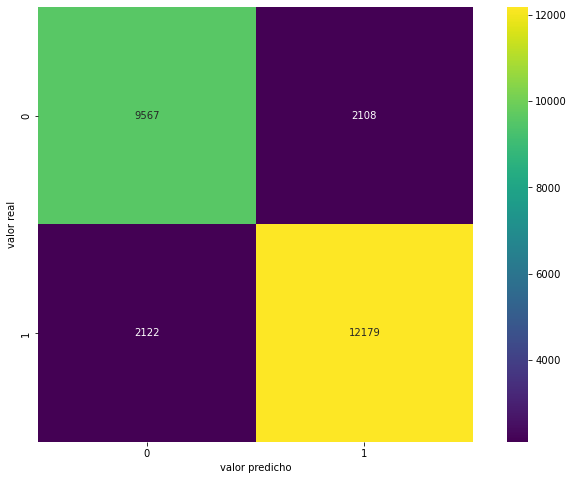

In [37]:
#Sacamos la matriz de confusion para comprobar la fiabilidad de nuestro modelo

mat_lr_esta = confusion_matrix(y_test1, y_pred_test_esta)


plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr_esta, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

In [38]:
#Hacemos una funcion para calcular todas las metricas de nuestro modelo
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [39]:
# Llamamos a la funcion con los datos de nuestro dataset
results_logistic_esta = metricas(y_test1, y_pred_test_esta, y_train1, y_pred_train_esta, "Regresión logistica Esta")
results_logistic_esta

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.837157,0.852453,0.851619,0.852036,0.670988,test,Regresión logistica Esta
1,0.835329,0.849347,0.849347,0.849347,0.667781,train,Regresión logistica Esta


### Conlusiones:

    -Accuracy: Nuestro modelo acierta el 83.7 % de las veces
    
    -Precision: Nuestro valor es de 0.85, eso significa que nuestro modelo se equivocara un 15% de las veces que prediga que un cliente no estará satisfecho

    -Recall: Tenemos un valor de 0.85, es decir que nuestro modelo es capaz de identificar un 85% de los pasajeros insatisfechos

    -Kappa: Nuestro valor es de 0.67; lo que implica que la concordancia de nuestros datos es buena (entre 0.6-0.8) y nuestro modelo no esta acertando en sus predicciones al azar

    -F1: Se acerca bastante a 1 por lo que nuestra media es buena

In [40]:
#abrimos nuestro archivo con los datos solo codificados
df_enc = pd.read_csv("datos/enc_airlines.csv", index_col = 0)
df_enc.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Distance
0,1,1,1,65,1,0,0,0,0,2,...,3,3,0,3,5,3,2,0,0,0
1,1,0,1,47,1,2,0,0,0,3,...,3,4,4,4,2,3,2,310,305,0
2,1,1,1,15,1,0,0,0,0,3,...,2,3,3,4,4,4,2,0,0,0
3,1,1,1,60,1,0,0,0,0,3,...,1,1,0,1,4,1,3,0,0,0
4,1,1,1,70,1,0,0,0,0,3,...,2,2,0,2,4,2,5,0,0,0


In [41]:
#Separamos X e y
X2 = df_enc.drop("satisfaction", axis = 1)
y2 = df_enc["satisfaction"]

In [42]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [43]:

# definimos la regresión logistica

log_reg = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg.fit(x_train2,y_train2)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train = log_reg.predict(x_train2)

# obtenemos las predicciones para el conjunto de test
y_pred_test = log_reg_esta.predict(x_test2)

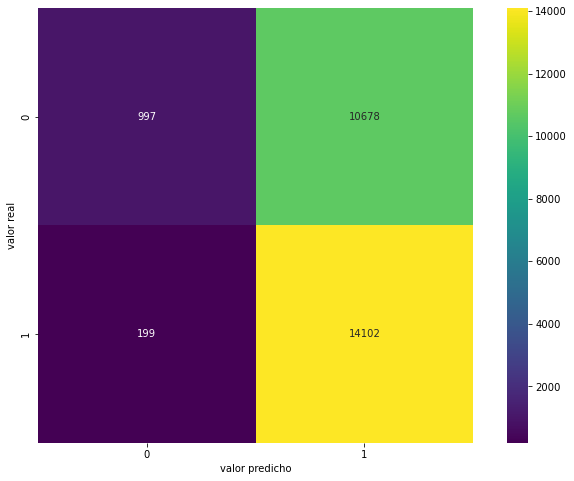

In [44]:
#sacamos la matriz de confusion

mat_lr = confusion_matrix(y_test2, y_pred_test)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

In [45]:
#sacamos los resultados de las metricas llamando a la funcion que hemos creado anteriormente
results_logistic = metricas(y_test2, y_pred_test, y_train2, y_pred_train, "Regresión logistica")
results_logistic

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.581267,0.569088,0.986085,0.721681,0.077901,test,Regresión logistica
1,0.835319,0.849344,0.849329,0.849337,0.667762,train,Regresión logistica


### Conlusiones:

    -Accuracy: Nuestro modelo acierta el 58 % de las veces
    
    -Precision: Nuestro valor es de 0.56, eso significa que nuestro modelo se equivocara un 44% de las veces que prediga que un cliente no estará satisfecho

    -Recall: Tenemos un valor de 0.98, es decir que nuestro modelo es capaz de identificar un 98% de los pasajeros insatisfechos

    -Kappa: Nuestro valor es de 0.07; lo que implica que la concordancia de nuestros datos es muy mala y nuestro modelo esta acertando en sus predicciones completamente al azar



In [46]:
#juntamos todos los resultados en un df para poder compararlos mejor
resultados_todo = pd.concat([results_logistic, results_logistic_esta], axis = 0)
resultados_todo

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.581267,0.569088,0.986085,0.721681,0.077901,test,Regresión logistica
1,0.835319,0.849344,0.849329,0.849337,0.667762,train,Regresión logistica
0,0.837157,0.852453,0.851619,0.852036,0.670988,test,Regresión logistica Esta
1,0.835329,0.849347,0.849347,0.849347,0.667781,train,Regresión logistica Esta


## Con todos los datos podemos afirmar que nuestro mejor modelo es el que tiene en cuenta los datos codificados y estandarizados

In [47]:
#Guardamos nuestros resultados en un df
resultados_todo.to_csv("datos/resultados_airlines_logistica.csv")